In [1]:
import keras
import keras.backend as K
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import np_utils
import numpy as np
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
num_classes = 10
img_rows, img_cols = 28, 28
image_size = 28

In [3]:
def load_data():    
    fashion_mnist = tf.keras.datasets.fashion_mnist
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

    if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test .reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)
    
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /=255
    
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    
    return x_train,  x_test, y_train, y_test

In [4]:
def plot_history(history):
    # 精度の履歴をプロット
    plt.plot(history.history['acc'],"o-",label="accuracy")
    plt.plot(history.history['val_acc'],"o-",label="val_acc")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
    plt.show()
 
    # 損失の履歴をプロット
    plt.plot(history.history['loss'],"o-",label="loss",)
    plt.plot(history.history['val_loss'],"o-",label="val_loss")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='lower right')
    plt.show()

In [5]:
def create_model():
    
    model = Sequential()
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=(image_size, image_size, 1)))
    model.add(Activation('relu'))

    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
        
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    
    return model

In [6]:
x_train,  x_test, y_train, y_test = load_data()

model = create_model()

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test, y_test))

2021-12-08 07:45:25.396125: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-08 07:45:25.396864: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 150s 3ms/step - loss: 1.0736 - accuracy: 0.6206 - val_loss: 0.6657 - val_accuracy: 0.7524
Epoch 2/50
60000/60000 [==============================] - 151s 3ms/step - loss: 0.6481 - accuracy: 0.7635 - val_loss: 0.5596 - val_accuracy: 0.7977
Epoch 3/50
60000/60000 [==============================] - 151s 3ms/step - loss: 0.5775 - accuracy: 0.7896 - val_loss: 0.5149 - val_accuracy: 0.8147
Epoch 4/50
60000/60000 [==============================] - 151s 3ms/step - loss: 0.5282 - accuracy: 0.8084 - val_loss: 0.4823 - val_accuracy: 0.8285
Epoch 5/50
60000/60000 [==============================] - 151s 3ms/step - loss: 0.4919 - accuracy: 0.8238 - val_loss: 0.4508 - val_accuracy: 0.8444
Epoch 6/50
60000/60000 [==============================] - 151s 3ms/step - loss: 0.4640 - accuracy: 0.8348 - val_loss: 0.4350 - val_accuracy: 0.8460
Epoch 7/50
60000/60000 [==============================] - 151s

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)             

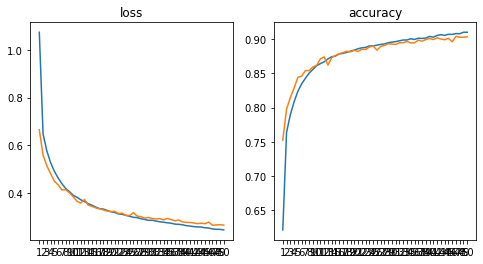

In [8]:
import matplotlib.pyplot as plt
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(8, 4))

epochs = np.arange(1, len(history.history['loss']) + 1)

# 各エポックの誤差の推移
axes1.set_title('loss')
axes1.plot(epochs, history.history['loss'], label='train')
axes1.plot(epochs, history.history['val_loss'], label='validation')
axes1.set_xticks(epochs)

# 各エポックの精度の推移
axes2.set_title('accuracy')
axes2.plot(epochs, history.history['accuracy'], label='train')
axes2.plot(epochs, history.history['val_accuracy'], label='validation')
axes2.set_xticks(epochs)

plt.show()

In [9]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.9036999940872192


In [11]:
import os
yaml_string = model.to_yaml()
open(os.path.join('opt/app/','baseline.yaml'), 'w').write(yaml_string)
print('save weights')
model.save_weights(os.path.join('opt/app/','baseline.hdf5'))

save weights
